# Test `pt_atkinson_tide` Module

Render figure object produced by the `nowcast.figures.publish.pt_atkinson_tide` module.
Provides data for visual testing to confirm that refactoring has not adversely changed figure for web page.

Set-up and function call replicates as nearly as possible what is done in the `nowcast.workers.make_plots` worker.

Notebooks like this should be developed in a
[Nowcast Figures Development Environment](https://salishsea-nowcast.readthedocs.io/en/latest/figures/fig_dev_env.html)
so that all of the necessary dependency packages are installed.
The development has to be done on a workstation that has the Salish Sea Nowcast system `/results/` parition mounted.

In [1]:
import io
from pathlib import Path

import arrow
import netCDF4 as nc
import yaml

from nowcast.figures.publish import pt_atkinson_tide

Python and library versions:

In [2]:
import bottleneck
import cmocean
import h5netcdf
import h5py
import matplotlib
import numpy
import sys
import xarray

print(f"Python {sys.version=}")
print(f"{numpy.__version__=}")
print(f"{xarray.__version__=}")
print(f"{bottleneck.__version__=}")
print(f"{h5netcdf.__version__=}")
print(f"{h5py.__version__=}")
print(f"{matplotlib.__version__=}")
print(f"{cmocean.__version__=}")

Python sys.version='3.13.1 | packaged by conda-forge | (main, Jan 13 2025, 09:53:10) [GCC 13.3.0]'
numpy.__version__='2.2.1'
xarray.__version__='2025.1.1'
bottleneck.__version__='1.4.2'
h5netcdf.__version__='1.4.1'
h5py.__version__='3.12.1'
matplotlib.__version__='3.10.0'
cmocean.__version__='v3.0.3'


## Simulate Nowcast System Config

The `config` multiline string contains the pieces of `nowcast/config/nowcast.yaml`
that are needed to set up the conditions as `nowcast.workers.make_plots` does
before calling the figure module `make_figure()` function.

The `yaml.safe_load()` call at the bottom of the cell converts the string into a `config` dict.

In [3]:
config = '''
    timezone: Canada/Pacific

    ssh:
        tidal_predictions: /SalishSeaCast/tidal-predictions/

    run:
        results_archive:
            forecast: /results/SalishSea/forecast.202111/
            forecast2: /results/SalishSea/forecast2.202111/
'''

config = yaml.safe_load(io.StringIO(config))

In [4]:
run_date = arrow.get('2025-01-28')
run_type = 'forecast'

dmy = run_date.format('DDMMMYY').lower()
start_day = {
    'nowcast': run_date.format('YYYYMMDD'),
    'forecast': run_date.shift(days=+1).format('YYYYMMDD'),
}
end_day = {
    'nowcast': run_date.format('YYYYMMDD'),
    'forecast': run_date.shift(days=+2).format('YYYYMMDD'),
}

results_home = Path(config['run']['results_archive'][run_type])
results_dir = results_home/dmy

In [5]:
grid_T_hr = nc.Dataset(
    results_dir / f'SalishSea_1h_{start_day[run_type]}_{end_day[run_type]}_grid_T.nc')
tidal_predictions = config['ssh']['tidal_predictions']

32.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


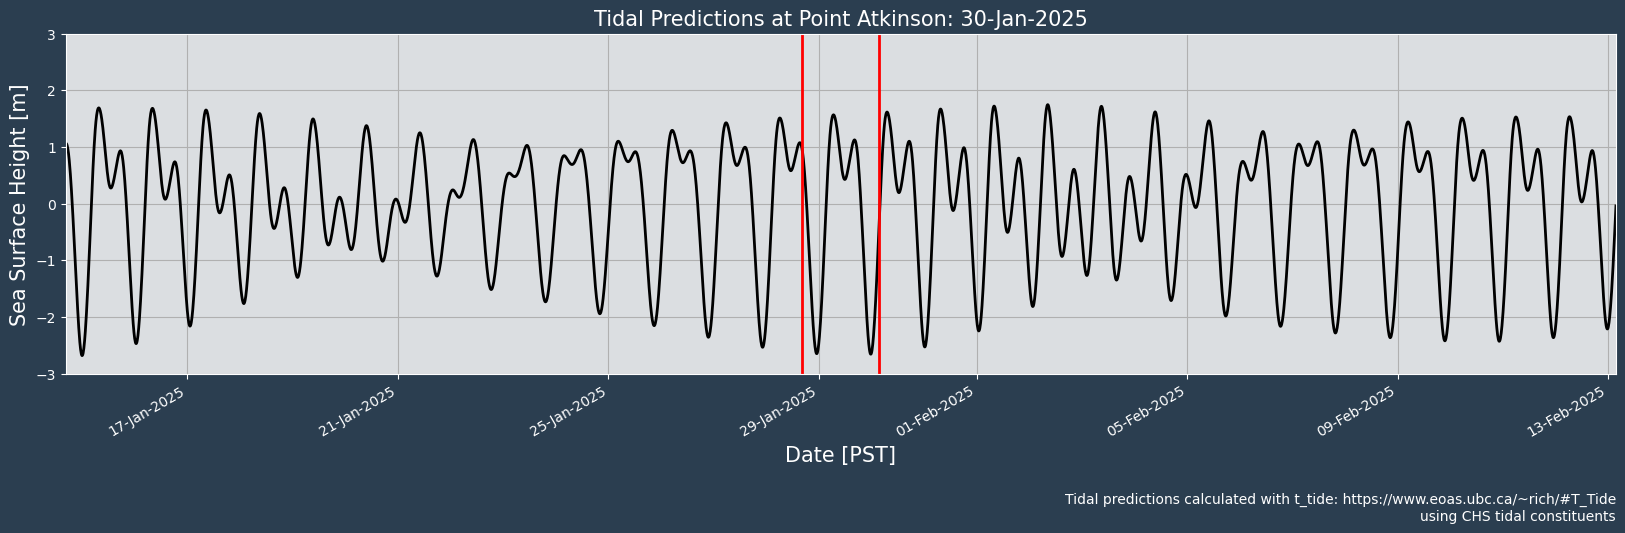

In [6]:
%%timeit -n1 -r1

# Refactored rendering of figure

from importlib import reload
from nowcast.figures import website_theme
reload(pt_atkinson_tide)
reload(website_theme)

fig = pt_atkinson_tide.make_figure(
    grid_T_hr, tidal_predictions, config['timezone'], theme=website_theme)